In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# import matplotlib

# from datetime import datetime
import os

# import cv2
import tensorflow as tf
from tqdm import tqdm

In [ ]:
def image_to_npy(folder_path):
    filenames = []
    for filename in os.listdir(folder_path):
        filenames.append(filename)

    lst_img = []
    for filename in tqdm(filenames):
        img = tf.keras.utils.load_img(folder_path + filename, target_size=(224,224,3))
        img = tf.keras.utils.img_to_array(img)
        img = img/255 
        lst_img.append(img)

    return lst_img

In [ ]:
img_healthy = image_to_npy('../datasets/sugarcane/healthy/')
len(img_healthy)

In [ ]:
img_red_rot = image_to_npy('../datasets/sugarcane/red_rot/')
len(img_red_rot)

In [ ]:
img_red_stripe = image_to_npy('../datasets/sugarcane/red_stripe/')
len(img_red_stripe)

In [ ]:
img_rust = image_to_npy('../datasets/sugarcane/rust/')
len(img_rust)

In [ ]:
img_bb = image_to_npy('../datasets/sugarcane/bacterial_blight/')
len(img_bb)

In [ ]:
# np.save('../datasets/sugarcane/image_healthy', img_healthy)
# np.save('../datasets/sugarcane/image_red_rot', img_red_rot)
# np.save('../datasets/sugarcane/image_red_stripe', img_red_stripe)
# np.save('../datasets/sugarcane/image_rust', img_rust)
# np.save('../datasets/sugarcane/image_bb', img_bb)

In [2]:
img_healthy = np.load('../datasets/sugarcane/image_healthy.npy')
img_red_rot = np.load('../datasets/sugarcane/image_red_rot.npy')
img_red_stripe = np.load('../datasets/sugarcane/image_red_stripe.npy')
img_rust = np.load('../datasets/sugarcane/image_rust.npy')
img_bb = np.load('../datasets/sugarcane/image_bb.npy')

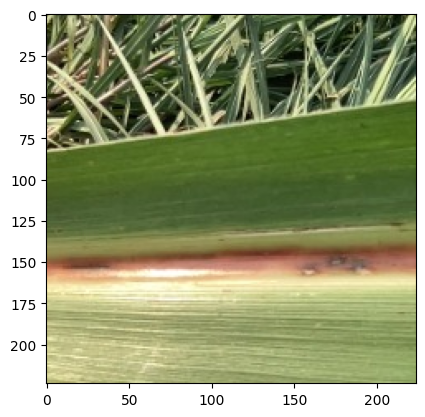

In [5]:
plt.imshow(img_healthy[0])
plt.imshow(img_red_rot[0])
# plt.imshow(img_red_stripe[0])
# plt.imshow(img_rust[0])
# plt.imshow(img_bb[0])

In [2]:
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
import tensorflow_hub as hub


In [6]:
# Set your dataset path
dataset_path = '../datasets/sugarcane_for_train'

# Use ImageDataGenerator for data augmentation and normalization
datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255, validation_split=0.2)

# Load and split the dataset
train_generator = datagen.flow_from_directory(
    dataset_path,
    target_size=(224, 224),  # EfficientNetV2 requires input size of 224x224
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

validation_generator = datagen.flow_from_directory(
    dataset_path,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)


Found 1067 images belonging to 2 classes.
Found 266 images belonging to 2 classes.


In [9]:
num_classes = 2

# Load EfficientNetV2 from TensorFlow Hub
efficientnet_url = "https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet1k_b0/feature_vector/2"
efficientnet = hub.KerasLayer(efficientnet_url)

model = models.Sequential([
    efficientnet,
    layers.Dense(num_classes, activation='softmax')  # num_classes is the number of disease classes
])

model.build([None, 224, 224, 3])  # Batch input shape

model.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [10]:
history = model.fit(train_generator, epochs=10, validation_data=validation_generator)

Epoch 1/10
34/34 [==============================] - 157s 4s/step - loss: 0.4938 - accuracy: 0.7751 - val_loss: 0.5396 - val_accuracy: 0.7180
Epoch 2/10
34/34 [==============================] - 140s 4s/step - loss: 0.2903 - accuracy: 0.9082 - val_loss: 0.4805 - val_accuracy: 0.7594
Epoch 3/10
34/34 [==============================] - 139s 4s/step - loss: 0.2223 - accuracy: 0.9381 - val_loss: 0.4565 - val_accuracy: 0.7481
Epoch 4/10
34/34 [==============================] - 154s 5s/step - loss: 0.1830 - accuracy: 0.9550 - val_loss: 0.4333 - val_accuracy: 0.7632
Epoch 5/10
34/34 [==============================] - 148s 4s/step - loss: 0.1590 - accuracy: 0.9653 - val_loss: 0.4164 - val_accuracy: 0.7669
Epoch 6/10
34/34 [==============================] - 141s 4s/step - loss: 0.1410 - accuracy: 0.9691 - val_loss: 0.4014 - val_accuracy: 0.7744
Epoch 7/10
34/34 [==============================] - 139s 4s/step - loss: 0.1267 - accuracy: 0.9756 - val_loss: 0.4106 - val_accuracy: 0.7632
Epoch 8/10
34

In [13]:
# Save the model
model.save('../model/efficientnetv2_model.keras')


In [16]:
# Load the model
import keras

loaded_model = keras.models.load_model('../model/efficientnetv2_model.keras')

ValueError: Unknown layer: 'KerasLayer'. Please ensure you are using a `keras.utils.custom_object_scope` and that this object is included in the scope. See https://www.tensorflow.org/guide/keras/save_and_serialize#registering_the_custom_object for details.

In [21]:
# from tensorflow.keras.models import load_model

# datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255, validation_split=0.2)

# class MyCustomLayer(tf.keras.layers.Layer):
#     train_generator = datagen.flow_from_directory(
#         dataset_path,
#         target_size=(224, 224),  # EfficientNetV2 requires input size of 224x224
#         batch_size=32,
#         class_mode='categorical',
#         subset='training'
#     )

#     validation_generator = datagen.flow_from_directory(
#         dataset_path,
#         target_size=(224, 224),
#         batch_size=32,
#         class_mode='categorical',
#         subset='validation'
#     )

# model = models.Sequential([
#     efficientnet,
#     layers.Dense(num_classes, activation='softmax')  # num_classes is the number of disease classes
# ])

# with tf.keras.utils.custom_object_scope({'MyCustomLayer': MyCustomLayer}):
#     loaded_model = load_model('../model/efficientnetv2_model.h5')

In [26]:
import numpy as np

# Assuming you have an image for prediction
img_path = '../datasets/sugarcane_for_train'


# Load and preprocess the image
img = tf.keras.preprocessing.image.load_img(img_path, target_size=(224, 224))
img_array = tf.keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)  # Create a batch

# Make predictions
# predictions = loaded_model.predict(img_array)

PermissionError: [Errno 13] Permission denied: '../datasets/sugarcane_for_train'

In [22]:
predictions = model.predict(img_array)

NameError: name 'img_array' is not defined

In [ ]:
predicted_class = np.argmax(predictions[0])
print(f"Predicted class: {predicted_class}")